# **Pendahuluan**

*   List item
*   List item



## **Business Understanding**

Pengambilan keputusan investasi oleh investor perlu dibuat secara rasional untuk memaksimalkan keuntungan. Dalam hal ini analisis fundamental perusahaan dapat dimanfaatkan oleh investor sebagai pertimbangan dalam keputusan investasinya. Analisis fundamental melihat kondisi internal perusahaan salah satunya melalui analisis laporan keuangan menggunakan rasio-rasio keuangan yang menginterpertasikan kondisi keuangan dan hasil operasi suatu perusahaan.

Analisis rasio keuangan adalah analisis yang menggabungkan evaluasi laporan keuangan dan laporan laba rugi terhadap satu dengan lainnya, yang memberikan gambaran tentang sejarah perusahaan dan penilaian kesehatan suatu perusahaan tertentu. Dalam perspektif data mining, masalah pemilihan saham bertujuan untuk mengidentifikasi saham potensial atau saham yang memberikan keuntungan tinggi. Clustering saham bisa digunakan untuk mengelompokkan saham berdasarkan beberapa indikator kinerja perusahaan. Seorang investor bisa memilih saham hasil analisis karakteristik saham dari clustering yang terbentuk.

## **Import Data**

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#change directory
%cd /content/drive/My\ Drive/

#change to spesific folder
%cd /content/drive/My\ Drive/Tim 18D Final Project Drive/Dataset

!pwd

Mounted at /content/drive
/content/drive/My Drive
/content/drive/My Drive/Tim 18D Final Project Drive/Dataset
/content/drive/My Drive/Tim 18D Final Project Drive/Dataset


In [ ]:
import pandas as pd

In [ ]:
#import the dataset
apln_bal = pd.read_csv('apln_bal_stat.csv')
bsde_bal = pd.read_csv('bsde_bal_stat.csv')
ctra_bal = pd.read_csv('ctra_bal_stat.csv')
dild_bal = pd.read_csv('dild_bal_stat.csv')
dmas_bal = pd.read_csv('dmas_bal_stat.csv')
lpkr_bal = pd.read_csv('lpkr_bal_stat.csv')
mdln_bal = pd.read_csv('mdln_bal_stat.csv')
pani_bal = pd.read_csv('pani_bal_stat.csv')
pwon_bal = pd.read_csv('pwon_bal_stat.csv')
smra_bal = pd.read_csv('smra_bal_stat.csv')
apln_inc = pd.read_csv('apln_income_stat.csv')
bsde_inc = pd.read_csv('bsde_income_stat.csv')
ctra_inc = pd.read_csv('ctra_income_stat.csv')
dild_inc = pd.read_csv('dild_income_stat.csv')
dmas_inc = pd.read_csv('dmas_income_stat.csv')
lpkr_inc = pd.read_csv('lpkr_income_stat.csv')
mdln_inc = pd.read_csv('mdln_income_stat.csv')
pani_inc = pd.read_csv('pani_income_stat.csv')
pwon_inc = pd.read_csv('pwon_income_stat.csv')
smra_inc = pd.read_csv('smra_income_stat.csv')

## **Exploratory Data Analysis**

### Feature Checking

In [ ]:
datasets = [apln_bal,bsde_bal,ctra_bal,dild_bal,dmas_bal,lpkr_bal,mdln_bal,pani_bal,pwon_bal,smra_bal]
titles = ['apln','bsde','ctra','dild','dmas','lpkr','mdln','pani','pwon','smra']

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features_check = pd.DataFrame({}, )
features_check['datasets'] = titles

features_check['numeric_features'] = [len((df.select_dtypes(include = numerics)).columns) for df in datasets]
features_check['numerical_features_name'] = [', '.join(list((df.select_dtypes(include = numerics)).columns)) for df in datasets]
features_check['categorical_features'] = [len((df.select_dtypes(include = 'object')).columns) for df in datasets]
features_check['categorical_features_name'] = [', '.join(list((df.select_dtypes(include = 'object')).columns)) for df in datasets]
features_check['boolean_features'] = [len((df.select_dtypes(include = 'bool')).columns) for df in datasets]
features_check['boolean_features_name'] = [', '.join(list((df.select_dtypes(include = 'bool')).columns)) for df in datasets]
features_check['total_columns'] = [len(df.columns) for df in datasets]
features_check['total_rows'] = [len(df) for df in datasets]
features_check.style.background_gradient(cmap = 'Blues')

,datasets,numeric_features,numerical_features_name,categorical_features,categorical_features_name,boolean_features,boolean_features_name,total_columns,total_rows
0,apln,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,73
1,bsde,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,78
2,ctra,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,69
3,dild,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,76
4,dmas,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,59
5,lpkr,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,81
6,mdln,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,74
7,pani,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,67
8,pwon,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,74
9,smra,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,72


In [ ]:
datasets = [apln_inc,bsde_inc,ctra_inc,dild_inc,dmas_inc,lpkr_inc,mdln_inc,pani_inc,pwon_inc,smra_inc]
titles = ['apln','bsde','ctra','dild','dmas','lpkr','mdln','pani','pwon','smra']

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features_check = pd.DataFrame({}, )
features_check['datasets'] = titles

features_check['numeric_features'] = [len((df.select_dtypes(include = numerics)).columns) for df in datasets]
features_check['numerical_features_name'] = [', '.join(list((df.select_dtypes(include = numerics)).columns)) for df in datasets]
features_check['categorical_features'] = [len((df.select_dtypes(include = 'object')).columns) for df in datasets]
features_check['categorical_features_name'] = [', '.join(list((df.select_dtypes(include = 'object')).columns)) for df in datasets]
features_check['boolean_features'] = [len((df.select_dtypes(include = 'bool')).columns) for df in datasets]
features_check['boolean_features_name'] = [', '.join(list((df.select_dtypes(include = 'bool')).columns)) for df in datasets]
features_check['total_columns'] = [len(df.columns) for df in datasets]
features_check['total_rows'] = [len(df) for df in datasets]
features_check.style.background_gradient(cmap = 'Greens')

,datasets,numeric_features,numerical_features_name,categorical_features,categorical_features_name,boolean_features,boolean_features_name,total_columns,total_rows
0,apln,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,50
1,bsde,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,53
2,ctra,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,46
3,dild,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,51
4,dmas,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,49
5,lpkr,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,55
6,mdln,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,51
7,pani,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,49
8,pwon,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,48
9,smra,4,"2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,Unnamed: 0,0,,5,45


### Feature Selection

In [ ]:
apln_bal = apln_bal.iloc[[0,1,2,5,7,9,10,18,26,37,43,51],:]
bsde_bal = bsde_bal.iloc[[1,2,3,6,8,10,11,20,28,39,53],:]
ctra_bal = ctra_bal.iloc[[1,2,3,6,8,9,10,19,27,35,40,46],:]
dild_bal = dild_bal.iloc[[0,1,2,5,7,9,10,18,29,40,53],:]
dmas_bal = dmas_bal.iloc[[0,1,2,4,6,8,9,16,31,37],:]
lpkr_bal = lpkr_bal.iloc[[1,2,3,6,8,10,11,20,29,39,54],:]
mdln_bal = mdln_bal.iloc[[1,2,3,6,8,10,11,20,28,38,42,50],:]
pani_bal = pani_bal.iloc[[0,1,2,5,7,9,10,18,25,35,44],:]
pwon_bal = pwon_bal.iloc[[0,1,2,5,7,9,10,18,27,38,42,50],:]
smra_bal = smra_bal.iloc[[0,1,2,5,7,9,10,18,28,39,49],:]

In [ ]:
apln_inc = apln_inc.iloc[[2,8,9,24,29,46,48],:]
bsde_inc = bsde_inc.iloc[[2,8,9,25,31,49,51],:]
ctra_inc = ctra_inc.iloc[[2,6,7,23,28,42,44],:]
dild_inc = dild_inc.iloc[[2,8,9,25,30,47,49],:]
dmas_inc = dmas_inc.iloc[[2,8,9,25,30,45,47],:]
lpkr_inc = lpkr_inc.iloc[[2,8,9,25,30,51,53],:]
mdln_inc = mdln_inc.iloc[[2,8,9,25,30,47,49],:]
pani_inc = pani_inc.iloc[[2,8,9,24,30,45,47],:]
pwon_inc = pwon_inc.iloc[[2,8,9,23,28,44,46],:]
smra_inc = smra_inc.iloc[[2,6,7,22,27,41,43],:]

### Display Data Frame

In [ ]:
apln_bal.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,1.200000e+01,1.200000e+01,1.200000e+01,1.100000e+01
mean,8.096346e+12,8.674274e+12,8.468044e+12,9.838694e+12
std,8.713183e+12,8.800400e+12,8.849479e+12,9.208722e+12
min,0.000000e+00,2.269933e+10,0.000000e+00,2.269933e+10
25%,1.708124e+12,1.726275e+12,1.708124e+12,3.126684e+12
50%,5.118991e+12,7.460460e+12,7.748287e+12,8.544600e+12
75%,1.144724e+13,1.150087e+13,1.065888e+13,1.343561e+13
max,2.832755e+13,2.861778e+13,2.961111e+13,3.039136e+13


In [ ]:
bsde_bal.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
mean,2.227045e+13,2.116363e+13,2.020514e+13,2.076921e+13
std,2.439903e+13,2.327536e+13,2.182800e+13,2.186498e+13
min,2.091340e+10,2.091340e+10,2.091340e+10,2.091340e+10
25%,1.331749e+12,1.340009e+12,1.325883e+12,1.358432e+12
50%,1.016212e+13,1.044809e+13,9.825598e+12,1.159065e+13
75%,4.155182e+13,3.886136e+13,3.636841e+13,3.591466e+13
max,6.682765e+13,6.499940e+13,6.146971e+13,6.086293e+13


In [ ]:
ctra_bal.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01
mean,1.411222e+13,1.349769e+13,1.204454e+13,1.140550e+13
std,1.481636e+13,1.405997e+13,1.324479e+13,1.238342e+13
min,1.853570e+10,1.853570e+10,0.000000e+00,7.926000e+09
25%,1.616939e+12,1.575300e+12,1.799733e+12,2.315376e+12
50%,7.469366e+12,8.037745e+12,6.421679e+12,5.810126e+12
75%,2.378069e+13,2.245686e+13,1.902141e+13,1.705010e+13
max,4.411522e+13,4.190238e+13,4.066841e+13,3.925519e+13


In [ ]:
dild_bal.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
mean,4.874715e+12,4.949931e+12,4.892590e+12,4.921450e+12
std,4.599857e+12,4.989266e+12,5.031966e+12,4.854987e+12
min,1.036585e+10,1.036585e+10,1.036585e+10,1.036585e+10
25%,1.477621e+12,1.381232e+12,1.414784e+12,1.402423e+12
50%,3.770950e+12,3.775377e+12,3.100446e+12,3.911695e+12
75%,6.887991e+12,6.651734e+12,6.639922e+12,6.667396e+12
max,1.460391e+13,1.635185e+13,1.646000e+13,1.570187e+13


In [ ]:
dmas_bal.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,3.554893e+12,3.480414e+12,3.273325e+12,3.405986e+12
std,2.987483e+12,2.926068e+12,2.748271e+12,2.886502e+12
min,1.098071e+09,0.000000e+00,7.034163e+08,1.358544e+09
25%,1.373392e+11,1.307937e+11,1.135685e+11,1.091430e+11
50%,5.348450e+12,5.270647e+12,5.083995e+12,5.172166e+12
75%,5.877090e+12,5.721483e+12,5.348179e+12,5.524520e+12
max,6.718508e+12,6.623414e+12,6.113942e+12,6.752233e+12


In [ ]:
lpkr_bal.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
mean,1.627431e+13,1.672922e+13,1.745938e+13,1.766989e+13
std,1.439826e+13,1.459577e+13,1.564989e+13,1.575818e+13
min,7.087732e+10,7.087902e+10,7.079512e+10,7.071325e+10
25%,9.341476e+12,9.680798e+12,7.873126e+12,8.328471e+12
50%,1.230611e+13,1.314226e+13,1.212226e+13,1.200256e+13
75%,2.111118e+13,2.189369e+13,2.481311e+13,2.547876e+13
max,4.957082e+13,4.987090e+13,5.208094e+13,5.186548e+13


In [ ]:
mdln_bal.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,1.100000e+01,1.100000e+01,1.100000e+01,1.200000e+01
mean,5.368312e+12,5.355055e+12,5.557102e+12,4.020496e+12
std,4.412476e+12,4.369775e+12,4.683396e+12,4.502218e+12
min,1.194732e+10,1.194732e+10,1.194732e+10,0.000000e+00
25%,2.620508e+12,2.617823e+12,2.657308e+12,8.091495e+10
50%,4.117192e+12,4.225532e+12,4.184097e+12,3.409569e+12
75%,8.061985e+12,8.026302e+12,8.588582e+12,4.635280e+12
max,1.368894e+13,1.352817e+13,1.453954e+13,1.485004e+13


In [ ]:
pani_bal.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,1.000000e+01,1.000000e+01,1.100000e+01,1.100000e+01
mean,8.874675e+12,2.637792e+12,2.130256e+12,3.553728e+10
std,1.080868e+13,4.779769e+12,4.050843e+12,2.766287e+10
min,1.562715e+10,1.353000e+10,5.770860e+09,5.770860e+09
25%,1.502523e+11,1.006390e+11,3.527423e+10,1.303462e+10
50%,7.247994e+12,1.688071e+12,4.739430e+11,3.970641e+10
75%,1.332100e+13,2.219868e+12,2.110959e+12,4.671376e+10
max,3.371201e+13,1.593844e+13,1.329626e+13,9.819121e+10


In [ ]:
pwon_bal.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,1.100000e+01,1.100000e+01,1.100000e+01,1.200000e+01
mean,1.196583e+13,1.112032e+13,1.034614e+13,8.411021e+12
std,1.242408e+13,1.153756e+13,1.074225e+13,9.419827e+12
min,4.815960e+10,4.815960e+10,4.815960e+10,4.815960e+10
25%,6.569749e+11,6.477434e+11,6.506402e+11,8.364739e+11
50%,6.129757e+12,6.248500e+12,5.656871e+12,2.954499e+12
75%,2.216146e+13,2.043188e+13,1.887514e+13,1.552211e+13
max,3.271079e+13,3.060218e+13,2.886608e+13,2.645881e+13


In [ ]:
smra_bal.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,1.100000e+01,1.100000e+01,1.100000e+01,1.100000e+01
mean,8.350112e+12,7.501881e+12,7.476499e+12,7.483990e+12
std,9.466699e+12,8.740008e+12,8.133945e+12,7.806454e+12
min,1.650857e+10,1.650857e+10,1.650857e+10,1.488878e+10
25%,1.680774e+12,1.010651e+12,9.843518e+11,8.871869e+11
50%,3.904927e+12,3.284023e+12,4.265354e+12,6.845846e+12
75%,1.154639e+13,1.083942e+13,1.072135e+13,1.006226e+13
max,3.116838e+13,2.843357e+13,2.604972e+13,2.492253e+13


In [ ]:
apln_inc.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,2.103567e+12,3.864295e+12,8.068016e+11,1.460268e+12
std,1.194444e+12,2.302946e+12,1.664774e+12,1.709594e+12
min,1.082668e+12,1.994917e+12,-6.503596e+11,-1.367861e+11
25%,1.543836e+12,2.677405e+12,-8.567112e+10,5.821060e+11
50%,1.907700e+12,3.075828e+12,3.404967e+11,1.014447e+12
75%,1.985137e+12,3.980344e+12,9.362853e+11,1.611840e+12
max,4.676652e+12,8.663825e+12,4.256245e+12,4.956325e+12


In [ ]:
bsde_inc.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,4.838236e+12,5.005855e+12,3.519733e+12,2.547817e+12
std,3.291105e+12,2.717038e+12,2.148978e+12,2.073844e+12
min,1.945467e+12,2.433147e+12,1.348623e+12,2.817009e+11
25%,3.055194e+12,3.465297e+12,2.267564e+12,1.308049e+12
50%,3.899941e+12,4.295224e+12,3.152221e+12,2.220347e+12
75%,5.186359e+12,5.573272e+12,3.973677e+12,3.267992e+12
max,1.153914e+13,1.023548e+13,7.654802e+12,6.180589e+12


In [ ]:
ctra_inc.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,4.062690e+12,4.039796e+12,4.273725e+12,3.314681e+12
std,2.460089e+12,2.411001e+12,2.611736e+12,2.300825e+12
min,1.846087e+12,1.862403e+12,1.735329e+12,1.320754e+12
25%,2.820160e+12,2.843288e+12,3.022061e+12,2.045140e+12
50%,3.574114e+12,3.517606e+12,3.783576e+12,2.799830e+12
75%,4.066638e+12,4.042594e+12,4.311697e+12,3.460582e+12
max,9.245032e+12,9.126799e+12,9.729651e+12,8.070737e+12


In [ ]:
dild_inc.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,1.477521e+12,1.056033e+12,8.131932e+11,9.262591e+11
std,1.171158e+12,1.046801e+12,8.892986e+11,9.594825e+11
min,1.741084e+11,-9.884447e+10,-3.011697e+10,3.189129e+10
25%,1.008788e+12,5.460906e+11,3.306063e+11,4.173783e+11
50%,1.326724e+12,9.842879e+11,6.957974e+11,7.719066e+11
75%,1.458706e+12,1.132925e+12,8.684138e+11,9.769356e+11
max,3.906826e+12,3.148755e+12,2.628632e+12,2.891388e+12


In [ ]:
dmas_inc.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,1.366905e+12,1.383529e+12,8.774213e+11,1.622305e+12
std,2.475845e+11,2.475944e+11,2.527092e+11,4.527417e+11
min,1.209798e+12,1.217292e+12,7.147405e+11,1.347650e+12
25%,1.256418e+12,1.265624e+12,7.593227e+11,1.406666e+12
50%,1.299230e+12,1.313766e+12,8.106461e+11,1.475276e+12
75%,1.312524e+12,1.344988e+12,8.285900e+11,1.545288e+12
max,1.921422e+12,1.932426e+12,1.440737e+12,2.629300e+12


In [ ]:
lpkr_inc.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,5.183382e+12,2.628709e+12,3.485217e+12,-2.459945e+12
std,5.640475e+12,6.030073e+12,6.062414e+12,7.891272e+12
min,5.014000e+10,-2.692075e+12,-1.602894e+12,-9.310773e+12
25%,2.182037e+12,-9.955600e+11,5.090250e+10,-8.179228e+12
50%,3.407117e+12,1.101242e+12,1.812225e+12,-5.965753e+12
75%,5.807718e+12,3.654416e+12,3.973426e+12,1.302204e+12
max,1.684690e+13,1.467409e+13,1.613853e+13,1.181096e+13


In [ ]:
mdln_inc.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,3.079246e+11,3.837909e+11,7.449809e+11,-7.729675e+11
std,4.328530e+11,3.681854e+11,7.457741e+11,9.788293e+11
min,-1.022893e+11,2.017073e+10,-4.199411e+10,-1.763880e+12
25%,5.132837e+10,1.668217e+11,2.275146e+11,-1.454170e+12
50%,2.309080e+11,3.342493e+11,5.220556e+11,-1.134600e+12
75%,3.859446e+11,4.498062e+11,1.135565e+12,-1.677302e+11
max,1.152308e+12,1.098860e+12,2.008646e+12,7.315078e+11


In [ ]:
pani_inc.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,9.515101e+11,2.645943e+11,4.638754e+10,2.978382e+10
std,5.843289e+11,1.624304e+11,1.192129e+11,6.664075e+10
min,2.700386e+11,1.381916e+11,-6.313341e+09,2.213598e+08
25%,7.684039e+11,1.735760e+11,-1.794121e+09,1.795774e+09
50%,8.080733e+11,1.955472e+11,-8.299290e+08,4.298639e+09
75%,9.433792e+11,2.967647e+11,9.630732e+09,9.957295e+09
max,2.158892e+12,5.777400e+11,3.161828e+11,1.804606e+11


In [ ]:
pwon_inc.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,3.210584e+12,2.747380e+12,2.472874e+12,1.775125e+12
std,1.377674e+12,1.519631e+12,1.495424e+12,1.020970e+12
min,2.105210e+12,1.538835e+12,1.382548e+12,9.299186e+11
25%,2.574864e+12,2.005803e+12,1.711644e+12,1.290486e+12
50%,2.806837e+12,2.226436e+12,1.914714e+12,1.485585e+12
75%,3.105936e+12,2.733676e+12,2.438147e+12,1.726095e+12
max,6.200438e+12,5.987433e+12,5.713273e+12,3.977211e+12


In [ ]:
smra_inc.describe()

,2023-12-31,2022-12-31,2021-12-31,2020-12-31
count,7.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00
mean,2.472190e+12,2.140926e+12,1.963058e+12,1.664852e+12
std,2.017954e+12,1.754866e+12,1.758425e+12,1.650227e+12
min,7.659700e+11,6.253773e+11,3.237088e+11,1.798353e+11
25%,1.422263e+12,1.181070e+12,1.039376e+12,7.511394e+11
50%,1.849361e+12,1.646880e+12,1.588533e+12,1.324897e+12
75%,2.593344e+12,2.316345e+12,2.091252e+12,1.808486e+12
max,6.658783e+12,5.719396e+12,5.567913e+12,5.029984e+12


## **Data Preprocessing**

### Missing Value Checking

In [ ]:
##Mengecek ada tidaknya missing value
datasets = [apln_bal,bsde_bal,ctra_bal,dild_bal,dmas_bal,lpkr_bal,mdln_bal,pani_bal,pwon_bal,smra_bal]
titles = ['apln','bsde','ctra','dild','dmas','lpkr','mdln','pani','pwon','smra']

missing_check = pd.DataFrame({}, )
missing_check['datasets'] = titles
missing_check['features'] = [', '.join([col for col, null in df.isnull().sum().items()]) for df in datasets]
missing_check['null_amount'] = [df.isnull().sum().sum() for df in datasets]
missing_check['null_features_amount'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
missing_check['null_features'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
missing_check.style.background_gradient(cmap='Blues')

,datasets,features,null_amount,null_features_amount,null_features
0,apln,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",1,1,2020-12-31
1,bsde,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
2,ctra,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",2,2,"2023-12-31, 2022-12-31"
3,dild,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
4,dmas,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
5,lpkr,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
6,mdln,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",3,3,"2023-12-31, 2022-12-31, 2021-12-31"
7,pani,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",2,2,"2023-12-31, 2022-12-31"
8,pwon,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",3,3,"2023-12-31, 2022-12-31, 2021-12-31"
9,smra,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,


In [ ]:
##Mengecek ada tidaknya missing value
datasets = [apln_inc,bsde_inc,ctra_inc,dild_inc,dmas_inc,lpkr_inc,mdln_inc,pani_inc,pwon_inc,smra_inc]
titles = ['apln','bsde','ctra','dild','dmas','lpkr','mdln','pani','pwon','smra']

missing_check = pd.DataFrame({}, )
missing_check['datasets'] = titles
missing_check['features'] = [', '.join([col for col, null in df.isnull().sum().items()]) for df in datasets]
missing_check['null_amount'] = [df.isnull().sum().sum() for df in datasets]
missing_check['null_features_amount'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
missing_check['null_features'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
missing_check.style.background_gradient(cmap='Greens')

,datasets,features,null_amount,null_features_amount,null_features
0,apln,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
1,bsde,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
2,ctra,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
3,dild,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
4,dmas,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
5,lpkr,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
6,mdln,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
7,pani,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
8,pwon,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
9,smra,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,


### Handling Missing Value

In [ ]:
apln_bal['2020-12-31'] = apln_bal['2020-12-31'].fillna(apln_bal['2020-12-31'].mean())
ctra_bal['2023-12-31'] = ctra_bal['2023-12-31'].fillna(ctra_bal['2023-12-31'].mean())
ctra_bal['2022-12-31'] = ctra_bal['2022-12-31'].fillna(ctra_bal['2022-12-31'].mean())
mdln_bal['2023-12-31'] = mdln_bal['2023-12-31'].fillna(mdln_bal['2023-12-31'].mean())
mdln_bal['2022-12-31'] = mdln_bal['2022-12-31'].fillna(mdln_bal['2022-12-31'].mean())
mdln_bal['2021-12-31'] = mdln_bal['2021-12-31'].fillna(mdln_bal['2021-12-31'].mean())
pani_bal['2023-12-31'] = pani_bal['2023-12-31'].fillna(pani_bal['2023-12-31'].mean())
pani_bal['2022-12-31'] = pani_bal['2022-12-31'].fillna(pani_bal['2022-12-31'].mean())
pwon_bal['2023-12-31'] = pwon_bal['2023-12-31'].fillna(pwon_bal['2023-12-31'].mean())
pwon_bal['2022-12-31'] = pwon_bal['2022-12-31'].fillna(pwon_bal['2022-12-31'].mean())
pwon_bal['2021-12-31'] = pwon_bal['2021-12-31'].fillna(pwon_bal['2021-12-31'].mean())

In [ ]:
##Mengecek ada tidaknya missing value
datasets = [apln_bal,bsde_bal,ctra_bal,dild_bal,dmas_bal,lpkr_bal,mdln_bal,pani_bal,pwon_bal,smra_bal]
titles = ['apln','bsde','ctra','dild','dmas','lpkr','mdln','pani','pwon','smra']

missing_check = pd.DataFrame({}, )
missing_check['datasets'] = titles
missing_check['features'] = [', '.join([col for col, null in df.isnull().sum().items()]) for df in datasets]
missing_check['null_amount'] = [df.isnull().sum().sum() for df in datasets]
missing_check['null_features_amount'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
missing_check['null_features'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
missing_check.style.background_gradient(cmap='Blues')

,datasets,features,null_amount,null_features_amount,null_features
0,apln,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
1,bsde,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
2,ctra,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
3,dild,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
4,dmas,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
5,lpkr,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
6,mdln,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
7,pani,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
8,pwon,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,
9,smra,"Unnamed: 0, 2023-12-31, 2022-12-31, 2021-12-31, 2020-12-31",0,0,


In [ ]:
apln_bal

,Unnamed: 0,2023-12-31,2022-12-31,2021-12-31,2020-12-31
0,Ordinary Shares Number,2.269933e+10,2.269933e+10,2.269933e+10,2.269933e+10
1,Share Issued,2.269933e+10,2.269933e+10,2.269933e+10,2.269933e+10
2,Net Debt,6.743568e+12,7.363161e+12,9.036207e+12,9.108055e+12
5,Invested Capital,1.820800e+13,1.807380e+13,1.791245e+13,1.849736e+13
7,Net Tangible Assets,1.066573e+13,9.581093e+12,7.783669e+12,8.514265e+12
9,Common Stock Equity,1.069606e+13,9.611428e+12,7.814004e+12,8.544600e+12
10,Total Capitalization,1.370078e+13,1.716919e+13,1.552691e+13,1.770791e+13
18,Common Stock,2.269933e+12,2.269933e+12,2.269933e+12,2.269933e+12
26,Long Term Debt,3.004714e+12,7.557760e+12,7.712905e+12,9.163314e+12
37,Total Assets,2.832755e+13,2.861778e+13,2.961111e+13,3.039136e+13


### Merge Data

In [ ]:
apln = apln_bal.merge(apln_inc, on = ['Unnamed: 0', '2023-12-31', '2022-12-31', '2021-12-31', '2020-12-31'], how = 'outer')
bsde = bsde_bal.merge(bsde_inc, on = ['Unnamed: 0', '2023-12-31', '2022-12-31', '2021-12-31', '2020-12-31'], how = 'outer')
ctra = ctra_bal.merge(ctra_inc, on = ['Unnamed: 0', '2023-12-31', '2022-12-31', '2021-12-31', '2020-12-31'], how = 'outer')
dild = dild_bal.merge(dild_inc, on = ['Unnamed: 0', '2023-12-31', '2022-12-31', '2021-12-31', '2020-12-31'], how = 'outer')
dmas = dmas_bal.merge(dmas_inc, on = ['Unnamed: 0', '2023-12-31', '2022-12-31', '2021-12-31', '2020-12-31'], how = 'outer')
lpkr = lpkr_bal.merge(lpkr_inc, on = ['Unnamed: 0', '2023-12-31', '2022-12-31', '2021-12-31', '2020-12-31'], how = 'outer')
mdln = mdln_bal.merge(mdln_inc, on = ['Unnamed: 0', '2023-12-31', '2022-12-31', '2021-12-31', '2020-12-31'], how = 'outer')
pani = pani_bal.merge(pani_inc, on = ['Unnamed: 0', '2023-12-31', '2022-12-31', '2021-12-31', '2020-12-31'], how = 'outer')
pwon = pwon_bal.merge(pwon_inc, on = ['Unnamed: 0', '2023-12-31', '2022-12-31', '2021-12-31', '2020-12-31'], how = 'outer')
smra = smra_bal.merge(smra_inc, on = ['Unnamed: 0', '2023-12-31', '2022-12-31', '2021-12-31', '2020-12-31'], how = 'outer')

### Data Merge

In [ ]:
def data(df,columns):
  melt = pd.melt(df, id_vars = ["Unnamed: 0"], value_vars = ['2023-12-31', '2022-12-31', '2021-12-31', '2020-12-31'])
  melt["index"] = melt["Unnamed: 0"] + " " + melt["variable"]
  melt.drop(["Unnamed: 0", "variable"], axis = 1, inplace = True)
  melt.rename(columns = {"value": columns, "index": "Company"}, inplace = True)
  melt.set_index("Company", inplace = True)
  return melt.transpose()

In [ ]:
apln = data(apln,"apln")
bsde = data(bsde,"bsde")
ctra = data(ctra,"ctra")
dild = data(dild,"dild")
dmas = data(dmas,"dmas")
lpkr = data(lpkr,"lpkr")
mdln = data(mdln,"mdln")
pani = data(pani,"pani")
pwon = data(pwon,"pwon")
smra = data(smra,"smra")

In [ ]:
data = pd.concat([apln,bsde,ctra,dild,dmas,lpkr,mdln,pani,pwon,smra])

In [ ]:
data

Company,Ordinary Shares Number 2023-12-31,Share Issued 2023-12-31,Net Debt 2023-12-31,Invested Capital 2023-12-31,Net Tangible Assets 2023-12-31,Common Stock Equity 2023-12-31,Total Capitalization 2023-12-31,Common Stock 2023-12-31,Long Term Debt 2023-12-31,Total Assets 2023-12-31,...,EBITDA 2020-12-31,EBIT 2020-12-31,Net Income 2020-12-31,Pretax Income 2020-12-31,Gross Profit 2020-12-31,Total Revenue 2020-12-31,Total Debt 2023-12-31,Total Debt 2022-12-31,Total Debt 2021-12-31,Total Debt 2020-12-31
apln,2.269933e+10,2.269933e+10,6.743568e+12,1.820800e+13,1.066573e+13,1.069606e+13,1.370078e+13,2.269933e+12,3.004714e+12,2.832755e+13,...,1.014447e+12,9.571997e+11,-1.367861e+11,2.070122e+11,2.201267e+12,4.956325e+12,NaN,NaN,NaN,NaN
bsde,2.091340e+10,2.117137e+10,2.366256e+12,4.826278e+13,3.154694e+13,3.647076e+13,4.663288e+13,2.117137e+12,1.016212e+13,6.682765e+13,...,2.284140e+12,2.220347e+12,2.817009e+11,4.962167e+11,4.251843e+12,6.180589e+12,NaN,NaN,NaN,NaN
ctra,1.853570e+10,1.853570e+10,1.411222e+13,2.813753e+13,2.004601e+13,2.004601e+13,2.751538e+13,4.633924e+12,7.469366e+12,4.411522e+13,...,2.799830e+12,2.662654e+12,1.320754e+12,1.427625e+12,4.121335e+12,8.070737e+12,NaN,NaN,NaN,NaN
dild,1.036585e+10,1.036585e+10,3.770950e+12,1.003268e+13,5.301233e+12,5.307417e+12,8.468564e+12,2.591464e+12,3.161147e+12,1.460391e+13,...,7.730970e+11,7.579900e+11,7.676647e+10,3.189129e+10,1.180774e+12,2.891388e+12,NaN,NaN,NaN,NaN
dmas,4.819811e+10,4.819811e+10,NaN,5.877090e+12,5.877090e+12,5.877090e+12,5.877090e+12,4.819811e+12,NaN,6.718508e+12,...,1.475366e+12,1.452031e+12,1.347650e+12,1.361300e+12,1.615210e+12,2.629300e+12,1.098071e+09,0.0,703416272.0,1.358544e+09
lpkr,7.087732e+10,7.089802e+10,1.173018e+13,2.969463e+13,1.466856e+13,1.531460e+13,2.690775e+13,7.089802e+12,1.159315e+13,4.957082e+13,...,-5.965753e+12,-7.467356e+12,-8.891100e+12,-9.310773e+12,4.131383e+12,1.181096e+13,NaN,NaN,NaN,NaN
mdln,1.194732e+10,1.253307e+10,6.166978e+12,1.046953e+13,3.546500e+12,4.117192e+12,9.956993e+12,2.330845e+12,5.839801e+12,1.368894e+13,...,-1.134600e+12,-1.178200e+12,-1.763880e+12,-1.730140e+12,3.611802e+11,7.315078e+11,NaN,NaN,NaN,NaN
pani,1.562715e+10,1.562715e+10,8.874675e+12,1.357900e+13,1.293327e+13,1.293327e+13,1.345024e+13,1.562715e+12,5.169687e+11,3.371201e+13,...,4.298639e+09,2.827444e+09,2.213598e+08,7.641047e+08,1.561595e+10,1.804606e+11,NaN,NaN,NaN,NaN
pwon,4.815960e+10,4.815960e+10,1.196583e+13,2.522634e+13,1.909658e+13,1.909658e+13,2.522634e+13,1.203990e+12,6.129757e+12,3.271079e+13,...,1.485585e+12,1.431993e+12,9.299186e+11,1.148979e+12,1.940893e+12,3.977211e+12,NaN,NaN,NaN,NaN
smra,1.650857e+10,1.650857e+10,3.904927e+12,1.702461e+13,9.826810e+12,9.826810e+12,1.326597e+13,1.650857e+12,3.439160e+12,3.116838e+13,...,1.324897e+12,1.258991e+12,1.798353e+11,2.432882e+11,2.292076e+12,5.029984e+12,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, apln to smra
Data columns (total 80 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Ordinary Shares Number 2023-12-31  10 non-null     float64
 1   Share Issued 2023-12-31            10 non-null     float64
 2   Net Debt 2023-12-31                9 non-null      float64
 3   Invested Capital 2023-12-31        10 non-null     float64
 4   Net Tangible Assets 2023-12-31     10 non-null     float64
 5   Common Stock Equity 2023-12-31     10 non-null     float64
 6   Total Capitalization 2023-12-31    10 non-null     float64
 7   Common Stock 2023-12-31            10 non-null     float64
 8   Long Term Debt 2023-12-31          9 non-null      float64
 9   Total Assets 2023-12-31            10 non-null     float64
 10  Financial Assets 2023-12-31        4 non-null      float64
 11  Net PPE 2023-12-31                 10 non-null     float64
 

In [ ]:
data.drop(['Net Debt 2023-12-31', 'Net Debt 2022-12-31', 'Net Debt 2021-12-31', 'Net Debt 2020-12-31', 'Long Term Debt 2023-12-31', 'Long Term Debt 2022-12-31', 'Long Term Debt 2021-12-31', 'Long Term Debt 2020-12-31', 'Financial Assets 2023-12-31', 'Financial Assets 2022-12-31', 'Financial Assets 2021-12-31', 'Financial Assets 2020-12-31', 'Total Debt 2023-12-31', 'Total Debt 2022-12-31', 'Total Debt 2021-12-31', 'Total Debt 2020-12-31'], axis = 1, inplace = True)

In [ ]:
data

Company,Ordinary Shares Number 2023-12-31,Share Issued 2023-12-31,Invested Capital 2023-12-31,Net Tangible Assets 2023-12-31,Common Stock Equity 2023-12-31,Total Capitalization 2023-12-31,Common Stock 2023-12-31,Total Assets 2023-12-31,Net PPE 2023-12-31,Normalized EBITDA 2023-12-31,...,Common Stock 2020-12-31,Total Assets 2020-12-31,Net PPE 2020-12-31,Normalized EBITDA 2020-12-31,EBITDA 2020-12-31,EBIT 2020-12-31,Net Income 2020-12-31,Pretax Income 2020-12-31,Gross Profit 2020-12-31,Total Revenue 2020-12-31
apln,2.269933e+10,2.269933e+10,1.820800e+13,1.066573e+13,1.069606e+13,1.370078e+13,2.269933e+12,2.832755e+13,3.494415e+12,2.002665e+12,...,2.269933e+12,3.039136e+13,3.983436e+12,1.022414e+12,1.014447e+12,9.571997e+11,-1.367861e+11,2.070122e+11,2.201267e+12,4.956325e+12
bsde,2.091340e+10,2.117137e+10,4.826278e+13,3.154694e+13,3.647076e+13,4.663288e+13,2.117137e+12,6.682765e+13,5.463613e+11,3.961031e+12,...,2.117137e+12,6.086293e+13,5.997271e+11,2.119882e+12,2.284140e+12,2.220347e+12,2.817009e+11,4.962167e+11,4.251843e+12,6.180589e+12
ctra,1.853570e+10,1.853570e+10,2.813753e+13,2.004601e+13,2.004601e+13,2.751538e+13,4.633924e+12,4.411522e+13,3.166096e+12,3.574114e+12,...,4.640076e+12,3.925519e+13,3.080981e+12,2.799830e+12,2.799830e+12,2.662654e+12,1.320754e+12,1.427625e+12,4.121335e+12,8.070737e+12
dild,1.036585e+10,1.036585e+10,1.003268e+13,5.301233e+12,5.307417e+12,8.468564e+12,2.591464e+12,1.460391e+13,3.637784e+11,1.267708e+12,...,2.591464e+12,1.570187e+13,2.133816e+11,7.719066e+11,7.730970e+11,7.579900e+11,7.676647e+10,3.189129e+10,1.180774e+12,2.891388e+12
dmas,4.819811e+10,4.819811e+10,5.877090e+12,5.877090e+12,5.877090e+12,5.877090e+12,4.819811e+12,6.718508e+12,4.047624e+11,1.299230e+12,...,4.819811e+12,6.752233e+12,2.919775e+11,1.475276e+12,1.475366e+12,1.452031e+12,1.347650e+12,1.361300e+12,1.615210e+12,2.629300e+12
lpkr,7.087732e+10,7.089802e+10,2.969463e+13,1.466856e+13,1.531460e+13,2.690775e+13,7.089802e+12,4.957082e+13,1.230611e+13,3.407117e+12,...,7.089802e+12,5.186548e+13,9.567140e+12,-1.526974e+12,-5.965753e+12,-7.467356e+12,-8.891100e+12,-9.310773e+12,4.131383e+12,1.181096e+13
mdln,1.194732e+10,1.253307e+10,1.046953e+13,3.546500e+12,4.117192e+12,9.956993e+12,2.330845e+12,1.368894e+13,2.910171e+12,2.340903e+11,...,2.330845e+12,1.485004e+13,3.169623e+12,-6.966406e+11,-1.134600e+12,-1.178200e+12,-1.763880e+12,-1.730140e+12,3.611802e+11,7.315078e+11
pani,1.562715e+10,1.562715e+10,1.357900e+13,1.293327e+13,1.293327e+13,1.345024e+13,1.562715e+12,3.371201e+13,2.801347e+10,8.080733e+11,...,4.100000e+10,9.819121e+10,2.486599e+10,4.298639e+09,4.298639e+09,2.827444e+09,2.213598e+08,7.641047e+08,1.561595e+10,1.804606e+11
pwon,4.815960e+10,4.815960e+10,2.522634e+13,1.909658e+13,1.909658e+13,2.522634e+13,1.203990e+12,3.271079e+13,2.727438e+12,2.811184e+12,...,1.203990e+12,2.645881e+13,2.362459e+12,1.511297e+12,1.485585e+12,1.431993e+12,9.299186e+11,1.148979e+12,1.940893e+12,3.977211e+12
smra,1.650857e+10,1.650857e+10,1.702461e+13,9.826810e+12,9.826810e+12,1.326597e+13,1.650857e+12,3.116838e+13,1.710692e+12,1.849361e+12,...,1.442678e+12,2.492253e+13,3.316956e+11,1.324897e+12,1.324897e+12,1.258991e+12,1.798353e+11,2.432882e+11,2.292076e+12,5.029984e+12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, apln to smra
Data columns (total 64 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Ordinary Shares Number 2023-12-31  10 non-null     float64
 1   Share Issued 2023-12-31            10 non-null     float64
 2   Invested Capital 2023-12-31        10 non-null     float64
 3   Net Tangible Assets 2023-12-31     10 non-null     float64
 4   Common Stock Equity 2023-12-31     10 non-null     float64
 5   Total Capitalization 2023-12-31    10 non-null     float64
 6   Common Stock 2023-12-31            10 non-null     float64
 7   Total Assets 2023-12-31            10 non-null     float64
 8   Net PPE 2023-12-31                 10 non-null     float64
 9   Normalized EBITDA 2023-12-31       10 non-null     float64
 10  EBITDA 2023-12-31                  10 non-null     float64
 11  EBIT 2023-12-31                    10 non-null     float64
 

### Feature

In [ ]:
data = data[['Ordinary Shares Number 2023-12-31', 'Ordinary Shares Number 2022-12-31', 'Ordinary Shares Number 2021-12-31', 'Ordinary Shares Number 2020-12-31', 'Invested Capital 2023-12-31', 'Invested Capital 2022-12-31', 'Invested Capital 2021-12-31', 'Invested Capital 2020-12-31', 'Common Stock 2023-12-31', 'Common Stock 2022-12-31', 'Common Stock 2021-12-31', 'Common Stock 2020-12-31', 'Total Capitalization 2023-12-31', 'Total Capitalization 2022-12-31', 'Total Capitalization 2021-12-31', 'Total Capitalization 2020-12-31', 'Net Income 2023-12-31', 'Net Income 2022-12-31', 'Net Income 2021-12-31', 'Net Income 2020-12-31', 'Total Revenue 2023-12-31', 'Total Revenue 2022-12-31', 'Total Revenue 2021-12-31', 'Total Revenue 2020-12-31']]

In [ ]:
data

Company,Ordinary Shares Number 2023-12-31,Ordinary Shares Number 2022-12-31,Ordinary Shares Number 2021-12-31,Ordinary Shares Number 2020-12-31,Invested Capital 2023-12-31,Invested Capital 2022-12-31,Invested Capital 2021-12-31,Invested Capital 2020-12-31,Common Stock 2023-12-31,Common Stock 2022-12-31,...,Total Capitalization 2021-12-31,Total Capitalization 2020-12-31,Net Income 2023-12-31,Net Income 2022-12-31,Net Income 2021-12-31,Net Income 2020-12-31,Total Revenue 2023-12-31,Total Revenue 2022-12-31,Total Revenue 2021-12-31,Total Revenue 2020-12-31
apln,2.269933e+10,2.269933e+10,2.269933e+10,2.269933e+10,1.820800e+13,1.807380e+13,1.791245e+13,1.849736e+13,2.269933e+12,2.269933e+12,...,1.552691e+13,1.770791e+13,1.082668e+12,1.994917e+12,-6.503596e+11,-1.367861e+11,4.676652e+12,8.663825e+12,4.256245e+12,4.956325e+12
bsde,2.091340e+10,2.091340e+10,2.091340e+10,2.091340e+10,4.826278e+13,4.557588e+13,4.342885e+13,4.721270e+13,2.117137e+12,2.117137e+12,...,4.128121e+13,4.170998e+13,1.945467e+12,2.433147e+12,1.348623e+12,2.817009e+11,1.153914e+13,1.023548e+13,7.654802e+12,6.180589e+12
ctra,1.853570e+10,1.853570e+10,1.853570e+10,1.853570e+10,2.813753e+13,2.735502e+13,2.652564e+13,2.535616e+13,4.633924e+12,4.640076e+12,...,2.517388e+13,2.220403e+13,1.846087e+12,1.862403e+12,1.735329e+12,1.320754e+12,9.245032e+12,9.126799e+12,9.729651e+12,8.070737e+12
dild,1.036585e+10,1.036585e+10,1.036585e+10,1.036585e+10,1.003268e+13,1.007313e+13,1.009274e+13,1.023330e+13,2.591464e+12,2.591464e+12,...,8.041340e+12,8.134897e+12,1.741084e+11,-9.884447e+10,1.313732e+10,7.676647e+10,3.906826e+12,3.148755e+12,2.628632e+12,2.891388e+12
dmas,4.819811e+10,4.819811e+10,4.819811e+10,4.819811e+10,5.877090e+12,5.721483e+12,5.348179e+12,5.524520e+12,4.819811e+12,4.819811e+12,...,5.348179e+12,5.524520e+12,1.209798e+12,1.217292e+12,7.147405e+11,1.347650e+12,1.921422e+12,1.932426e+12,1.440737e+12,2.629300e+12
lpkr,7.087732e+10,7.087902e+10,7.079512e+10,7.071325e+10,2.969463e+13,3.051071e+13,3.229692e+13,3.320292e+13,7.089802e+12,7.089802e+12,...,3.087424e+13,3.148003e+13,5.014000e+10,-2.692075e+12,-1.602894e+12,-8.891100e+12,1.684690e+13,1.467409e+13,1.613853e+13,1.181096e+13
mdln,1.194732e+10,1.194732e+10,1.194732e+10,1.194732e+10,1.046953e+13,1.037142e+13,1.078542e+13,1.000425e+13,2.330845e+12,2.330845e+12,...,1.068063e+13,4.323916e+12,-1.019745e+11,2.017073e+10,-4.199411e+10,-1.763880e+12,1.152308e+12,1.098860e+12,2.008646e+12,7.315078e+11
pani,1.562715e+10,1.353000e+10,5.770860e+09,5.770860e+09,1.357900e+13,2.418635e+12,4.799339e+12,5.740163e+10,1.562715e+12,1.353000e+12,...,5.592635e+11,5.242753e+10,2.700386e+11,1.381916e+11,1.661181e+09,2.213598e+08,2.158892e+12,5.777400e+11,3.161828e+11,1.804606e+11
pwon,4.815960e+10,4.815960e+10,4.815960e+10,4.815960e+10,2.522634e+13,2.355613e+13,2.175354e+13,1.857950e+13,1.203990e+12,1.203990e+12,...,2.170358e+13,1.818202e+13,2.105210e+12,1.538835e+12,1.382548e+12,9.299186e+11,6.200438e+12,5.987433e+12,5.713273e+12,3.977211e+12
smra,1.650857e+10,1.650857e+10,1.650857e+10,1.488878e+10,1.702461e+13,1.510625e+13,1.570046e+13,1.629814e+13,1.650857e+12,1.650857e+12,...,1.278153e+13,1.232870e+13,7.659700e+11,6.253773e+11,3.237088e+11,1.798353e+11,6.658783e+12,5.719396e+12,5.567913e+12,5.029984e+12


In [ ]:
OSN = ['Ordinary Shares Number 2023-12-31', 'Ordinary Shares Number 2022-12-31', 'Ordinary Shares Number 2021-12-31', 'Ordinary Shares Number 2020-12-31']
IC = ['Invested Capital 2023-12-31', 'Invested Capital 2022-12-31', 'Invested Capital 2021-12-31', 'Invested Capital 2020-12-31']
CS = ['Common Stock 2023-12-31', 'Common Stock 2022-12-31', 'Common Stock 2021-12-31', 'Common Stock 2020-12-31']
TC = ['Total Capitalization 2023-12-31', 'Total Capitalization 2022-12-31', 'Total Capitalization 2021-12-31', 'Total Capitalization 2020-12-31']
NI = ['Net Income 2023-12-31', 'Net Income 2022-12-31', 'Net Income 2021-12-31', 'Net Income 2020-12-31']
TR = ['Total Revenue 2023-12-31', 'Total Revenue 2022-12-31', 'Total Revenue 2021-12-31', 'Total Revenue 2020-12-31']

# Hitung rerata dari empat kolom dan simpan hasilnya dalam satu kolom baru
data['Ordinary Share Number'] = data[OSN].mean(axis=1)
data['Invested Capital'] = data[IC].mean(axis=1)
data['Common Stock'] = data[CS].mean(axis=1)
data['Total Capitalization'] = data[TC].mean(axis=1)
data['Net Income'] = data[NI].mean(axis=1)
data['Total Revenue'] = data[TR].mean(axis=1)

<ipython-input-44-cdc49c587e1d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ordinary Share Number'] = data[OSN].mean(axis=1)
<ipython-input-44-cdc49c587e1d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Invested Capital'] = data[IC].mean(axis=1)
<ipython-input-44-cdc49c587e1d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [ ]:
data

Company,Ordinary Shares Number 2023-12-31,Ordinary Shares Number 2022-12-31,Ordinary Shares Number 2021-12-31,Ordinary Shares Number 2020-12-31,Invested Capital 2023-12-31,Invested Capital 2022-12-31,Invested Capital 2021-12-31,Invested Capital 2020-12-31,Common Stock 2023-12-31,Common Stock 2022-12-31,...,Total Revenue 2023-12-31,Total Revenue 2022-12-31,Total Revenue 2021-12-31,Total Revenue 2020-12-31,Ordinary Share Number,Invested Capital,Common Stock,Total Capitalization,Net Income,Total Revenue
apln,2.269933e+10,2.269933e+10,2.269933e+10,2.269933e+10,1.820800e+13,1.807380e+13,1.791245e+13,1.849736e+13,2.269933e+12,2.269933e+12,...,4.676652e+12,8.663825e+12,4.256245e+12,4.956325e+12,2.269933e+10,1.817290e+13,2.269933e+12,1.602620e+13,5.726098e+11,5.638262e+12
bsde,2.091340e+10,2.091340e+10,2.091340e+10,2.091340e+10,4.826278e+13,4.557588e+13,4.342885e+13,4.721270e+13,2.117137e+12,2.117137e+12,...,1.153914e+13,1.023548e+13,7.654802e+12,6.180589e+12,2.091340e+10,4.612005e+13,2.117137e+12,4.342737e+13,1.502235e+12,8.902503e+12
ctra,1.853570e+10,1.853570e+10,1.853570e+10,1.853570e+10,2.813753e+13,2.735502e+13,2.652564e+13,2.535616e+13,4.633924e+12,4.640076e+12,...,9.245032e+12,9.126799e+12,9.729651e+12,8.070737e+12,1.853570e+10,2.684359e+13,4.638538e+12,2.534225e+13,1.691143e+12,9.043055e+12
dild,1.036585e+10,1.036585e+10,1.036585e+10,1.036585e+10,1.003268e+13,1.007313e+13,1.009274e+13,1.023330e+13,2.591464e+12,2.591464e+12,...,3.906826e+12,3.148755e+12,2.628632e+12,2.891388e+12,1.036585e+10,1.010796e+13,2.591464e+12,8.203302e+12,4.129193e+10,3.143900e+12
dmas,4.819811e+10,4.819811e+10,4.819811e+10,4.819811e+10,5.877090e+12,5.721483e+12,5.348179e+12,5.524520e+12,4.819811e+12,4.819811e+12,...,1.921422e+12,1.932426e+12,1.440737e+12,2.629300e+12,4.819811e+10,5.617818e+12,4.819811e+12,5.617818e+12,1.122370e+12,1.980971e+12
lpkr,7.087732e+10,7.087902e+10,7.079512e+10,7.071325e+10,2.969463e+13,3.051071e+13,3.229692e+13,3.320292e+13,7.089802e+12,7.089802e+12,...,1.684690e+13,1.467409e+13,1.613853e+13,1.181096e+13,7.081618e+10,3.142630e+13,7.089802e+12,2.943171e+13,-3.283982e+12,1.486762e+13
mdln,1.194732e+10,1.194732e+10,1.194732e+10,1.194732e+10,1.046953e+13,1.037142e+13,1.078542e+13,1.000425e+13,2.330845e+12,2.330845e+12,...,1.152308e+12,1.098860e+12,2.008646e+12,7.315078e+11,1.194732e+10,1.040766e+13,2.330845e+12,8.749995e+12,-4.719195e+11,1.247830e+12
pani,1.562715e+10,1.353000e+10,5.770860e+09,5.770860e+09,1.357900e+13,2.418635e+12,4.799339e+12,5.740163e+10,1.562715e+12,1.353000e+12,...,2.158892e+12,5.777400e+11,3.161828e+11,1.804606e+11,1.017472e+10,5.213595e+12,7.494288e+11,4.086844e+12,1.025282e+11,8.083190e+11
pwon,4.815960e+10,4.815960e+10,4.815960e+10,4.815960e+10,2.522634e+13,2.355613e+13,2.175354e+13,1.857950e+13,1.203990e+12,1.203990e+12,...,6.200438e+12,5.987433e+12,5.713273e+12,3.977211e+12,4.815960e+10,2.227888e+13,1.203990e+12,2.216701e+13,1.489128e+12,5.469589e+12
smra,1.650857e+10,1.650857e+10,1.650857e+10,1.488878e+10,1.702461e+13,1.510625e+13,1.570046e+13,1.629814e+13,1.650857e+12,1.650857e+12,...,6.658783e+12,5.719396e+12,5.567913e+12,5.029984e+12,1.610362e+10,1.603237e+13,1.598812e+12,1.271441e+13,4.737229e+11,5.744019e+12


In [ ]:
drop = ['Ordinary Shares Number 2023-12-31', 'Ordinary Shares Number 2022-12-31', 'Ordinary Shares Number 2021-12-31', 'Ordinary Shares Number 2020-12-31', 'Invested Capital 2023-12-31', 'Invested Capital 2022-12-31', 'Invested Capital 2021-12-31', 'Invested Capital 2020-12-31', 'Common Stock 2023-12-31', 'Common Stock 2022-12-31', 'Common Stock 2021-12-31', 'Common Stock 2020-12-31', 'Total Capitalization 2023-12-31', 'Total Capitalization 2022-12-31', 'Total Capitalization 2021-12-31', 'Total Capitalization 2020-12-31', 'Net Income 2023-12-31', 'Net Income 2022-12-31', 'Net Income 2021-12-31', 'Net Income 2020-12-31', 'Total Revenue 2023-12-31', 'Total Revenue 2022-12-31', 'Total Revenue 2021-12-31', 'Total Revenue 2020-12-31']
data.drop(drop, axis=1, inplace=True)

<ipython-input-46-1c8904101824>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(drop, axis=1, inplace=True)


In [ ]:
data

Company,Ordinary Share Number,Invested Capital,Common Stock,Total Capitalization,Net Income,Total Revenue
apln,2.269933e+10,1.817290e+13,2.269933e+12,1.602620e+13,5.726098e+11,5.638262e+12
bsde,2.091340e+10,4.612005e+13,2.117137e+12,4.342737e+13,1.502235e+12,8.902503e+12
ctra,1.853570e+10,2.684359e+13,4.638538e+12,2.534225e+13,1.691143e+12,9.043055e+12
dild,1.036585e+10,1.010796e+13,2.591464e+12,8.203302e+12,4.129193e+10,3.143900e+12
dmas,4.819811e+10,5.617818e+12,4.819811e+12,5.617818e+12,1.122370e+12,1.980971e+12
lpkr,7.081618e+10,3.142630e+13,7.089802e+12,2.943171e+13,-3.283982e+12,1.486762e+13
mdln,1.194732e+10,1.040766e+13,2.330845e+12,8.749995e+12,-4.719195e+11,1.247830e+12
pani,1.017472e+10,5.213595e+12,7.494288e+11,4.086844e+12,1.025282e+11,8.083190e+11
pwon,4.815960e+10,2.227888e+13,1.203990e+12,2.216701e+13,1.489128e+12,5.469589e+12
smra,1.610362e+10,1.603237e+13,1.598812e+12,1.271441e+13,4.737229e+11,5.744019e+12


## **Modeling Data**

### K-Means

In [ ]:
data

Company,Ordinary Share Number,Invested Capital,Common Stock,Total Capitalization,Net Income,Total Revenue
apln,2.269933e+10,1.817290e+13,2.269933e+12,1.602620e+13,5.726098e+11,5.638262e+12
bsde,2.091340e+10,4.612005e+13,2.117137e+12,4.342737e+13,1.502235e+12,8.902503e+12
ctra,1.853570e+10,2.684359e+13,4.638538e+12,2.534225e+13,1.691143e+12,9.043055e+12
dild,1.036585e+10,1.010796e+13,2.591464e+12,8.203302e+12,4.129193e+10,3.143900e+12
dmas,4.819811e+10,5.617818e+12,4.819811e+12,5.617818e+12,1.122370e+12,1.980971e+12
lpkr,7.081618e+10,3.142630e+13,7.089802e+12,2.943171e+13,-3.283982e+12,1.486762e+13
mdln,1.194732e+10,1.040766e+13,2.330845e+12,8.749995e+12,-4.719195e+11,1.247830e+12
pani,1.017472e+10,5.213595e+12,7.494288e+11,4.086844e+12,1.025282e+11,8.083190e+11
pwon,4.815960e+10,2.227888e+13,1.203990e+12,2.216701e+13,1.489128e+12,5.469589e+12
smra,1.610362e+10,1.603237e+13,1.598812e+12,1.271441e+13,4.737229e+11,5.744019e+12


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

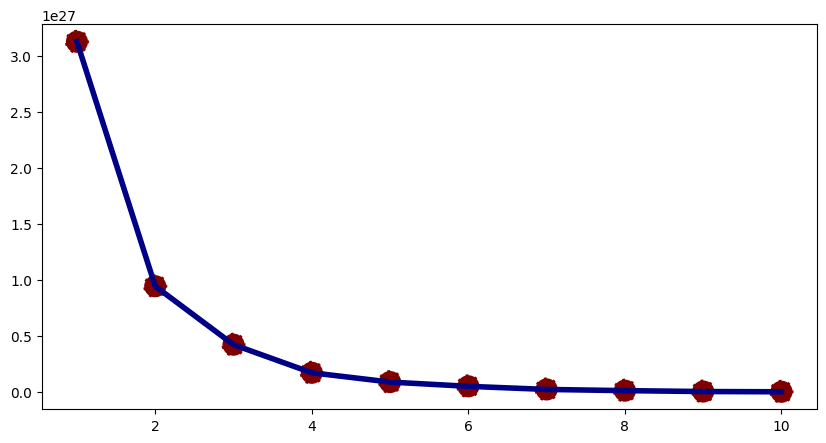

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))

sns.lineplot(x=range(1, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
data['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-50-61ec4e316595>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = kmeans.labels_


In [ ]:
kmeans.inertia_

9.418945633404743e+26

In [ ]:
data

Company,Ordinary Share Number,Invested Capital,Common Stock,Total Capitalization,Net Income,Total Revenue,cluster
apln,2.269933e+10,1.817290e+13,2.269933e+12,1.602620e+13,5.726098e+11,5.638262e+12,1
bsde,2.091340e+10,4.612005e+13,2.117137e+12,4.342737e+13,1.502235e+12,8.902503e+12,0
ctra,1.853570e+10,2.684359e+13,4.638538e+12,2.534225e+13,1.691143e+12,9.043055e+12,0
dild,1.036585e+10,1.010796e+13,2.591464e+12,8.203302e+12,4.129193e+10,3.143900e+12,1
dmas,4.819811e+10,5.617818e+12,4.819811e+12,5.617818e+12,1.122370e+12,1.980971e+12,1
lpkr,7.081618e+10,3.142630e+13,7.089802e+12,2.943171e+13,-3.283982e+12,1.486762e+13,0
mdln,1.194732e+10,1.040766e+13,2.330845e+12,8.749995e+12,-4.719195e+11,1.247830e+12,1
pani,1.017472e+10,5.213595e+12,7.494288e+11,4.086844e+12,1.025282e+11,8.083190e+11,1
pwon,4.815960e+10,2.227888e+13,1.203990e+12,2.216701e+13,1.489128e+12,5.469589e+12,0
smra,1.610362e+10,1.603237e+13,1.598812e+12,1.271441e+13,4.737229e+11,5.744019e+12,1


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(data)
pcs = pca.transform(data)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca.head()

,PC 1,PC 2
0,-1.825425e+12,-1.609054e+11
1,3.717981e+13,-4.592775e+12
2,1.136809e+13,1.142703e+12
3,-1.331766e+13,1.607187e+11
4,-1.840341e+13,8.674717e+11


In [ ]:
data.groupby('cluster').agg(['mean','median'])

Company Ordinary Share Number               Invested Capital                \
                         mean        median             mean        median   
cluster                                                                      
0                3.960622e+10  3.453650e+10     3.166720e+13  2.913494e+13   
1                1.991482e+10  1.402547e+10     1.092538e+13  1.025781e+13   

Company  Common Stock               Total Capitalization                \
                 mean        median                 mean        median   
cluster                                                                  
0        3.762367e+12  3.377837e+12         3.009209e+13  2.738698e+13   
1        2.393382e+12  2.300389e+12         9.233094e+12  8.476649e+12   

Company    Net Income               Total Revenue                
                 mean        median          mean        median  
cluster                                                          
0        3.496309e+11  1.495681e+12  9.570691e+12  8.972779e+12  
1        3.067673e+11  2.881255e+11  3.093884e+12  2.562436e+12

In [ ]:
data['cluster'].value_counts()

cluster
1    6
0    4
Name: count, dtype: int64

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(data)
Kmeans_silhouette_score = silhouette_score(data, labels)

print("Silhouette Score:", Kmeans_silhouette_score)

Silhouette Score: 0.5276264828187976


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Agglomerative

In [ ]:
data

Company,Ordinary Share Number,Invested Capital,Common Stock,Total Capitalization,Net Income,Total Revenue,cluster
apln,2.269933e+10,1.817290e+13,2.269933e+12,1.602620e+13,5.726098e+11,5.638262e+12,1
bsde,2.091340e+10,4.612005e+13,2.117137e+12,4.342737e+13,1.502235e+12,8.902503e+12,0
ctra,1.853570e+10,2.684359e+13,4.638538e+12,2.534225e+13,1.691143e+12,9.043055e+12,0
dild,1.036585e+10,1.010796e+13,2.591464e+12,8.203302e+12,4.129193e+10,3.143900e+12,1
dmas,4.819811e+10,5.617818e+12,4.819811e+12,5.617818e+12,1.122370e+12,1.980971e+12,1
lpkr,7.081618e+10,3.142630e+13,7.089802e+12,2.943171e+13,-3.283982e+12,1.486762e+13,0
mdln,1.194732e+10,1.040766e+13,2.330845e+12,8.749995e+12,-4.719195e+11,1.247830e+12,1
pani,1.017472e+10,5.213595e+12,7.494288e+11,4.086844e+12,1.025282e+11,8.083190e+11,1
pwon,4.815960e+10,2.227888e+13,1.203990e+12,2.216701e+13,1.489128e+12,5.469589e+12,0
smra,1.610362e+10,1.603237e+13,1.598812e+12,1.271441e+13,4.737229e+11,5.744019e+12,1


In [ ]:
data = data.drop('cluster', axis=1)

In [ ]:
data

Company,Ordinary Share Number,Invested Capital,Common Stock,Total Capitalization,Net Income,Total Revenue
apln,2.269933e+10,1.817290e+13,2.269933e+12,1.602620e+13,5.726098e+11,5.638262e+12
bsde,2.091340e+10,4.612005e+13,2.117137e+12,4.342737e+13,1.502235e+12,8.902503e+12
ctra,1.853570e+10,2.684359e+13,4.638538e+12,2.534225e+13,1.691143e+12,9.043055e+12
dild,1.036585e+10,1.010796e+13,2.591464e+12,8.203302e+12,4.129193e+10,3.143900e+12
dmas,4.819811e+10,5.617818e+12,4.819811e+12,5.617818e+12,1.122370e+12,1.980971e+12
lpkr,7.081618e+10,3.142630e+13,7.089802e+12,2.943171e+13,-3.283982e+12,1.486762e+13
mdln,1.194732e+10,1.040766e+13,2.330845e+12,8.749995e+12,-4.719195e+11,1.247830e+12
pani,1.017472e+10,5.213595e+12,7.494288e+11,4.086844e+12,1.025282e+11,8.083190e+11
pwon,4.815960e+10,2.227888e+13,1.203990e+12,2.216701e+13,1.489128e+12,5.469589e+12
smra,1.610362e+10,1.603237e+13,1.598812e+12,1.271441e+13,4.737229e+11,5.744019e+12


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)

In [ ]:
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

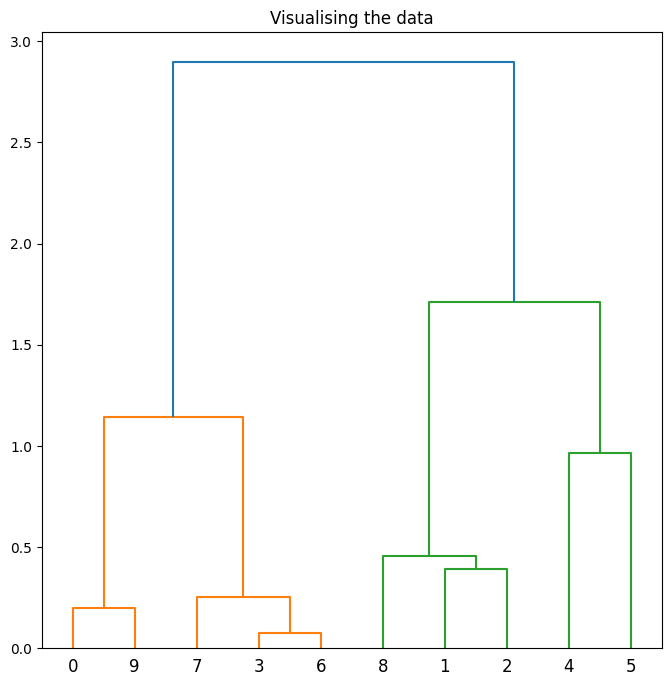

In [ ]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))

Optimal number of clusters: 2


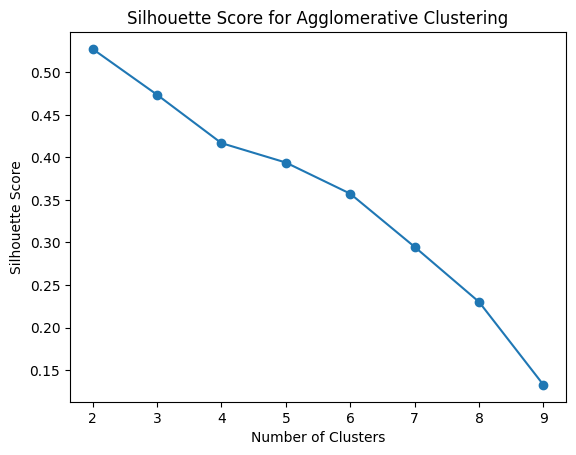

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

min_clusters = 2
max_clusters = 9
cluster_range = range(min_clusters, max_clusters + 1)

silhouette_scores = []

for n_clusters in cluster_range:
    agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agg_clustering.fit_predict(data)
    agglomerative_silhouette_score = silhouette_score(data, labels)
    silhouette_scores.append(agglomerative_silhouette_score)

optimal_num_clusters = cluster_range[np.argmax(silhouette_scores)]
print("Optimal number of clusters:", optimal_num_clusters)

import matplotlib.pyplot as plt

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Agglomerative Clustering')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering().fit(data)
clustering.labels_

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(data)
agglomerative_silhouette_score = silhouette_score(data, labels)

print("Silhouette Score:", agglomerative_silhouette_score)

Silhouette Score: 0.5276264828187976


### Mean shift

In [ ]:
data

Company,Ordinary Share Number,Invested Capital,Common Stock,Total Capitalization,Net Income,Total Revenue
apln,2.269933e+10,1.817290e+13,2.269933e+12,1.602620e+13,5.726098e+11,5.638262e+12
bsde,2.091340e+10,4.612005e+13,2.117137e+12,4.342737e+13,1.502235e+12,8.902503e+12
ctra,1.853570e+10,2.684359e+13,4.638538e+12,2.534225e+13,1.691143e+12,9.043055e+12
dild,1.036585e+10,1.010796e+13,2.591464e+12,8.203302e+12,4.129193e+10,3.143900e+12
dmas,4.819811e+10,5.617818e+12,4.819811e+12,5.617818e+12,1.122370e+12,1.980971e+12
lpkr,7.081618e+10,3.142630e+13,7.089802e+12,2.943171e+13,-3.283982e+12,1.486762e+13
mdln,1.194732e+10,1.040766e+13,2.330845e+12,8.749995e+12,-4.719195e+11,1.247830e+12
pani,1.017472e+10,5.213595e+12,7.494288e+11,4.086844e+12,1.025282e+11,8.083190e+11
pwon,4.815960e+10,2.227888e+13,1.203990e+12,2.216701e+13,1.489128e+12,5.469589e+12
smra,1.610362e+10,1.603237e+13,1.598812e+12,1.271441e+13,4.737229e+11,5.744019e+12


In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(data, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(data)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5


In [ ]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

meanshift = MeanShift()
labels = meanshift.fit_predict(data)
mean_shift_silhouette_score = silhouette_score(data, labels)

print("Silhouette Score:", mean_shift_silhouette_score)

Silhouette Score: 0.4427617578904558


### Gaussian Mixture

In [ ]:
data

Company,Ordinary Share Number,Invested Capital,Common Stock,Total Capitalization,Net Income,Total Revenue
apln,2.269933e+10,1.817290e+13,2.269933e+12,1.602620e+13,5.726098e+11,5.638262e+12
bsde,2.091340e+10,4.612005e+13,2.117137e+12,4.342737e+13,1.502235e+12,8.902503e+12
ctra,1.853570e+10,2.684359e+13,4.638538e+12,2.534225e+13,1.691143e+12,9.043055e+12
dild,1.036585e+10,1.010796e+13,2.591464e+12,8.203302e+12,4.129193e+10,3.143900e+12
dmas,4.819811e+10,5.617818e+12,4.819811e+12,5.617818e+12,1.122370e+12,1.980971e+12
lpkr,7.081618e+10,3.142630e+13,7.089802e+12,2.943171e+13,-3.283982e+12,1.486762e+13
mdln,1.194732e+10,1.040766e+13,2.330845e+12,8.749995e+12,-4.719195e+11,1.247830e+12
pani,1.017472e+10,5.213595e+12,7.494288e+11,4.086844e+12,1.025282e+11,8.083190e+11
pwon,4.815960e+10,2.227888e+13,1.203990e+12,2.216701e+13,1.489128e+12,5.469589e+12
smra,1.610362e+10,1.603237e+13,1.598812e+12,1.271441e+13,4.737229e+11,5.744019e+12


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(data)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(df)
labels = gmm.predict(df)
gaussian_mixture_silhouette_score = silhouette_score(df, labels)

print("Cluster labels:", labels)
print("Silhouette Score:", gaussian_mixture_silhouette_score)

Cluster labels: [0 0 0 0 0 1 0 0 0 0]
Silhouette Score: 0.4753223754356317


## **Best Model**

### Silhouette Score

In [ ]:
best_score = -1
best_model = None

silhouette_scores = {
    'K-means': Kmeans_silhouette_score,
    'Agglomerative': agglomerative_silhouette_score,
    'Mean-shift': mean_shift_silhouette_score,
    'Gaussian Mixture': gaussian_mixture_silhouette_score
}
for algorithm, score in silhouette_scores.items():
    if score > best_score:
        best_score = score
        best_model = algorithm

print("Best clustering algorithm:", best_model)
print("Best silhouette score:", best_score)

Best clustering algorithm: K-means
Best silhouette score: 0.5276264828187976


### Davies - Bouldin

In [ ]:
data

Company,Ordinary Share Number,Invested Capital,Common Stock,Total Capitalization,Net Income,Total Revenue
apln,2.269933e+10,1.817290e+13,2.269933e+12,1.602620e+13,5.726098e+11,5.638262e+12
bsde,2.091340e+10,4.612005e+13,2.117137e+12,4.342737e+13,1.502235e+12,8.902503e+12
ctra,1.853570e+10,2.684359e+13,4.638538e+12,2.534225e+13,1.691143e+12,9.043055e+12
dild,1.036585e+10,1.010796e+13,2.591464e+12,8.203302e+12,4.129193e+10,3.143900e+12
dmas,4.819811e+10,5.617818e+12,4.819811e+12,5.617818e+12,1.122370e+12,1.980971e+12
lpkr,7.081618e+10,3.142630e+13,7.089802e+12,2.943171e+13,-3.283982e+12,1.486762e+13
mdln,1.194732e+10,1.040766e+13,2.330845e+12,8.749995e+12,-4.719195e+11,1.247830e+12
pani,1.017472e+10,5.213595e+12,7.494288e+11,4.086844e+12,1.025282e+11,8.083190e+11
pwon,4.815960e+10,2.227888e+13,1.203990e+12,2.216701e+13,1.489128e+12,5.469589e+12
smra,1.610362e+10,1.603237e+13,1.598812e+12,1.271441e+13,4.737229e+11,5.744019e+12


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

km_clustering = KMeans(n_clusters=2)
km_labels = km_clustering.fit_predict(data)
davies_bouldin_kmeans = davies_bouldin_score(data, km_labels)

print("Davies-Bouldin index:", davies_bouldin_kmeans)

Davies-Bouldin index: 0.5893481316477365


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score

agg_clustering = AgglomerativeClustering(n_clusters=2)
agg_labels = agg_clustering.fit_predict(data)
davies_bouldin_agglomerative = davies_bouldin_score(data, agg_labels)

print("Davies-Bouldin index:", davies_bouldin_agglomerative)

Davies-Bouldin index: 0.5893481316477365


In [ ]:
from sklearn.cluster import MeanShift
from sklearn.metrics import pairwise_distances
import numpy as np

mean_shift = MeanShift()
cluster_centers = mean_shift.fit(data).cluster_centers_
labels = mean_shift.labels_

num_clusters = len(cluster_centers)
pairwise_distances_centers = pairwise_distances(cluster_centers)

avg_distances_within_clusters = []
for i in range(num_clusters):
    cluster_points = data[labels == i]
    avg_distance = np.mean(pairwise_distances(cluster_points, [cluster_centers[i]]))
    avg_distances_within_clusters.append(avg_distance)

davies_bouldin_ms = 0
for i in range(num_clusters):
    for j in range(num_clusters):
        if i != j:
            db_index = (avg_distances_within_clusters[i] + avg_distances_within_clusters[j]) / pairwise_distances_centers[i][j]
            if db_index > davies_bouldin_ms:
                davies_bouldin_ms = db_index

print("Davies-Bouldin index:", davies_bouldin_ms)

Davies-Bouldin index: 0.7524939359537441


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import davies_bouldin_score

gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(df)
labels = gmm.predict(df)
davies_bouldin_gmm = davies_bouldin_score(df, labels)

print("Davies-Bouldin index:", davies_bouldin_gmm)

Davies-Bouldin index: 0.3210468400304225


In [ ]:
davies_bouldin_scores = {
    'K-means': davies_bouldin_kmeans,
    'Agglomerative': davies_bouldin_agglomerative,
    'Mean Shift': davies_bouldin_ms,
    'Gaussian Mixture': davies_bouldin_gmm
}
best_algorithm = min(davies_bouldin_scores, key=davies_bouldin_scores.get)
best_score = davies_bouldin_scores[best_algorithm]

print("Best algorithm:", best_algorithm)
print("Best Davies-Bouldin score:", best_score)

Best algorithm: Gaussian Mixture
Best Davies-Bouldin score: 0.3210468400304225


### Calinski Harabasz

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(data)
calinski_harabasz_kmeans = calinski_harabasz_score(data, labels)

print("Calinski-Harabasz score:", calinski_harabasz_kmeans)

Calinski-Harabasz score: 18.532439047029285


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score

agg_clustering = AgglomerativeClustering(n_clusters=2)
labels = agg_clustering.fit_predict(data)
calinski_harabasz_agg = calinski_harabasz_score(data, labels)

print("Calinski-Harabasz score:", calinski_harabasz_agg)

Calinski-Harabasz score: 18.532439047029285


In [ ]:
from sklearn.cluster import MeanShift
from sklearn.metrics import calinski_harabasz_score
import numpy as np

mean_shift = MeanShift()
labels = mean_shift.fit_predict(df)
cluster_centers = mean_shift.cluster_centers_

overall_center = np.mean(df, axis=0)

within_cluster_dispersion = 0
for i, center in enumerate(cluster_centers):
    cluster_points = df[labels == i]
    within_cluster_dispersion += np.sum((cluster_points - center) ** 2)

between_cluster_dispersion = 0
for center in cluster_centers:
    between_cluster_dispersion += np.sum((center - overall_center) ** 2)

calinski_harabasz_ms = (between_cluster_dispersion / within_cluster_dispersion) * ((len(df) - len(cluster_centers)) / (len(cluster_centers) - 1))

print("Calinski-Harabasz score:", calinski_harabasz_ms)

Calinski-Harabasz score: 5.2997522134727655


In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm = GaussianMixture(n_components=2, random_state=42)
labels = gmm.fit_predict(df)

cluster_centers = gmm.means_

within_cluster_dispersion = 0
for i in range(len(cluster_centers)):
    cluster_points = df[labels == i]
    within_cluster_dispersion += np.sum((cluster_points - cluster_centers[i])**2)

overall_center = np.mean(df, axis=0)
between_cluster_dispersion = 0
for i in range(len(cluster_centers)):
    between_cluster_dispersion += len(df[labels == i]) * np.sum((cluster_centers[i] - overall_center)**2)

calinski_harabasz_gm = (between_cluster_dispersion / within_cluster_dispersion) * ((len(df) - len(cluster_centers)) / (len(cluster_centers) - 1))

print("Calinski-Harabasz score:", calinski_harabasz_gm)

Calinski-Harabasz score: 6.1777029695599355


In [ ]:
# Assuming you have calculated Calinski-Harabasz scores for K-means, Agglomerative, Gaussian Mixture, and Mean Shift
calinski_harabasz_scores = {
    'K-means': calinski_harabasz_kmeans,
    'Agglomerative': calinski_harabasz_agg,
    'Gaussian Mixture': calinski_harabasz_gm,
    'Mean Shift': calinski_harabasz_ms
}

# Find the clustering algorithm with the highest Calinski-Harabasz score
best_algorithm = max(calinski_harabasz_scores, key=calinski_harabasz_scores.get)
best_score = calinski_harabasz_scores[best_algorithm]

# Print the best algorithm and its score
print("Best algorithm:", best_algorithm)
print("Best Calinski-Harabasz score:", best_score)

Best algorithm: K-means
Best Calinski-Harabasz score: 18.532439047029285


### Score Model

In [ ]:
import pandas as pd

# Create a dictionary with the scores
scores = {
    'sillhouette score': [Kmeans_silhouette_score, agglomerative_silhouette_score, mean_shift_silhouette_score, gaussian_mixture_silhouette_score],
    'davies bouldin': [davies_bouldin_kmeans, davies_bouldin_agglomerative, davies_bouldin_ms, davies_bouldin_gmm],
    'calinski-harabasz': [calinski_harabasz_kmeans, calinski_harabasz_agg, calinski_harabasz_ms, calinski_harabasz_gm]
}
best_model = pd.DataFrame(scores, index=['kmeans', 'agglomerative', 'mean-shift', 'gaussian mixture'])

print(best_model)

                  sillhouette score  davies bouldin  calinski-harabasz
kmeans                     0.527626        0.589348          18.532439
agglomerative              0.527626        0.589348          18.532439
mean-shift                 0.442762        0.752494           5.299752
gaussian mixture           0.475322        0.321047           6.177703


Pemilihan model diambil berdasarkan silhoutte score tertinggi, davies bouldin terendah, dan calinski-harabasz tertinggi. Sehingga didapatkan model terbaiknya adalah **K-Means clustering**

## **Cluster Analysis**

In [ ]:
data

Company,Ordinary Share Number,Invested Capital,Common Stock,Total Capitalization,Net Income,Total Revenue
apln,2.269933e+10,1.817290e+13,2.269933e+12,1.602620e+13,5.726098e+11,5.638262e+12
bsde,2.091340e+10,4.612005e+13,2.117137e+12,4.342737e+13,1.502235e+12,8.902503e+12
ctra,1.853570e+10,2.684359e+13,4.638538e+12,2.534225e+13,1.691143e+12,9.043055e+12
dild,1.036585e+10,1.010796e+13,2.591464e+12,8.203302e+12,4.129193e+10,3.143900e+12
dmas,4.819811e+10,5.617818e+12,4.819811e+12,5.617818e+12,1.122370e+12,1.980971e+12
lpkr,7.081618e+10,3.142630e+13,7.089802e+12,2.943171e+13,-3.283982e+12,1.486762e+13
mdln,1.194732e+10,1.040766e+13,2.330845e+12,8.749995e+12,-4.719195e+11,1.247830e+12
pani,1.017472e+10,5.213595e+12,7.494288e+11,4.086844e+12,1.025282e+11,8.083190e+11
pwon,4.815960e+10,2.227888e+13,1.203990e+12,2.216701e+13,1.489128e+12,5.469589e+12
smra,1.610362e+10,1.603237e+13,1.598812e+12,1.271441e+13,4.737229e+11,5.744019e+12


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
clusters = kmeans.labels_
data['clusters'] = clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
data

Company,Ordinary Share Number,Invested Capital,Common Stock,Total Capitalization,Net Income,Total Revenue,clusters
apln,2.269933e+10,1.817290e+13,2.269933e+12,1.602620e+13,5.726098e+11,5.638262e+12,1
bsde,2.091340e+10,4.612005e+13,2.117137e+12,4.342737e+13,1.502235e+12,8.902503e+12,0
ctra,1.853570e+10,2.684359e+13,4.638538e+12,2.534225e+13,1.691143e+12,9.043055e+12,0
dild,1.036585e+10,1.010796e+13,2.591464e+12,8.203302e+12,4.129193e+10,3.143900e+12,1
dmas,4.819811e+10,5.617818e+12,4.819811e+12,5.617818e+12,1.122370e+12,1.980971e+12,1
lpkr,7.081618e+10,3.142630e+13,7.089802e+12,2.943171e+13,-3.283982e+12,1.486762e+13,0
mdln,1.194732e+10,1.040766e+13,2.330845e+12,8.749995e+12,-4.719195e+11,1.247830e+12,1
pani,1.017472e+10,5.213595e+12,7.494288e+11,4.086844e+12,1.025282e+11,8.083190e+11,1
pwon,4.815960e+10,2.227888e+13,1.203990e+12,2.216701e+13,1.489128e+12,5.469589e+12,0
smra,1.610362e+10,1.603237e+13,1.598812e+12,1.271441e+13,4.737229e+11,5.744019e+12,1


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(data)
pcs = pca.transform(data)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca

,PC 1,PC 2
0,-1.825425e+12,-1.609054e+11
1,3.717981e+13,-4.592775e+12
2,1.136809e+13,1.142703e+12
3,-1.331766e+13,1.607187e+11
4,-1.840341e+13,8.674717e+11
5,1.858723e+13,7.584106e+12
6,-1.310992e+13,-1.339116e+12
7,-2.008002e+13,-1.536775e+12
8,5.193258e+12,-2.381759e+12
9,-5.591938e+12,2.563305e+11


In [ ]:
df_pca['clusters'] = clusters
df_pca

,PC 1,PC 2,clusters
0,-1.825425e+12,-1.609054e+11,1
1,3.717981e+13,-4.592775e+12,0
2,1.136809e+13,1.142703e+12,0
3,-1.331766e+13,1.607187e+11,1
4,-1.840341e+13,8.674717e+11,1
5,1.858723e+13,7.584106e+12,0
6,-1.310992e+13,-1.339116e+12,1
7,-2.008002e+13,-1.536775e+12,1
8,5.193258e+12,-2.381759e+12,0
9,-5.591938e+12,2.563305e+11,1


<Axes: xlabel='PC 1', ylabel='PC 2'>

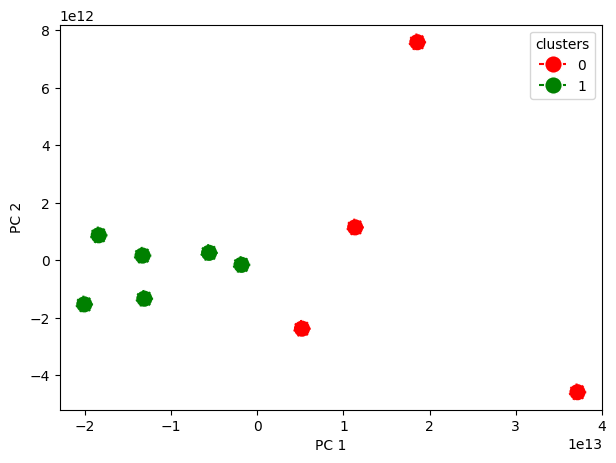

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    palette=['red', 'green'],
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

In [ ]:
for i in data.iloc[:,0:6].columns:
    nilai_maksimal = data[i].max()

    baris_dengan_nilai_maksimal = data[i].idxmax()

    print("Nilai maksimal kolom",i,": ", nilai_maksimal)
    print("Terletak pada baris:", baris_dengan_nilai_maksimal,"\n")

Nilai maksimal kolom Ordinary Share Number :  70816175594.0
Terletak pada baris: lpkr 

Nilai maksimal kolom Invested Capital :  46120051420664.25
Terletak pada baris: bsde 

Nilai maksimal kolom Common Stock :  7089802000000.0
Terletak pada baris: lpkr 

Nilai maksimal kolom Total Capitalization :  43427367970043.25
Terletak pada baris: bsde 

Nilai maksimal kolom Net Income :  1691143250000.0
Terletak pada baris: ctra 

Nilai maksimal kolom Total Revenue :  14867619250000.0
Terletak pada baris: lpkr 

